In [13]:
import sys
import os
import glob
from skimage import io
from matplotlib import pyplot as plt
from skimage.transform import resize, rotate
from skimage.measure import find_contours, approximate_polygon, regionprops, label
from skimage.color import label2rgb
from skimage.draw import circle_perimeter, rectangle_perimeter
from skimage.util import invert
from skimage import color

In [14]:
n_of_cases = 5
path = os.path.join('D:\Dokumenty\Projekty\PIRO/project1/proj1_daneA\set0', '')
images_paths = glob.glob(os.path.join(path, '*.png'))

# img = io.imread(images_paths[0])
# # shape = img.shape
# # for image_path in images_paths:
# #     img = io.imread(image_path)
# #     contours = find_contours(img, level=3)
# #     n_of_angles = len(approximate_polygon(contours[0], tolerance=10))-1
# #     print(n_of_angles)
    
# img  = io.imread(images_paths[0])
# contours = find_contours(img, level=3)
# img = color.grey2rgb(img)
# appr_pol = approximate_polygon(contours[0], tolerance=10)
# for c in appr_pol:
#     x,y = circle_perimeter(int(c[0]),int(c[1]), 3)
#     img[x,y] = [255,0,0]
    
# io.imshow(img)
# plt.show()

In [ ]:
# img  = io.imread(images_paths[5])
# label_img = label(img, connectivity=2)

# biggest_region = regionprops(label_img)[0]
# for region in regionprops(label_img):
#     if region.area > biggest_region.area:
#         biggest_region = region
# print(biggest_region.area)
# print(biggest_region.bbox)
# # contours = find_contours(img, level=3)
# # img = color.grey2rgb(img)
# # appr_pol = approximate_polygon(contours[0], tolerance=10)
# # for c in appr_pol:
# #     x,y = circle_perimeter(int(c[0]),int(c[1]), 3)
# #     img[x,y] = [255,0,0]
    
# x,y = rectangle_perimeter((biggest_region.bbox[0],biggest_region.bbox[1]), (biggest_region.bbox[2],biggest_region.bbox[3]))
# img = color.grey2rgb(img)
# img[x,y] = [255,0,0]
# io.imshow(rotate(img, -171.7241071729248))
# # plt.show()

In [16]:
import math 
import numpy as np
def get_line_lenght(point1, point2):
    return math.pow((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2 , 0.5)
def get_angle_of_line(line):
    (point1, point2) = line
    return math.atan2(point2[1] - point1[1], point2[0] - point1[0]) * 180 / np.pi

In [17]:
from skimage.transform import probabilistic_hough_line
from skimage.feature import canny

def get_angle_to_rotate_image(image):
    edges = canny(image, 2, 1, 25)
    lines = probabilistic_hough_line(edges, threshold=1, line_length=5, line_gap=3)
    longest_line = (lines[0],  get_line_lenght(lines[0][0], lines[0][1]))
    for line in lines:
        temp_lenght = get_line_lenght(line[0], line[1])
        if temp_lenght > longest_line[1]:
            longest_line = (line, temp_lenght)

    angle = get_angle_of_line(longest_line[0])
    return angle

In [ ]:
images = list()
for image_path in images_paths:
    img = io.imread(image_path)
    angle = get_angle_to_rotate_image(img)
    img = rotate(img, angle)
    images.append(img)

In [ ]:
io.imshow(images[5])

In [ ]:
images_cut = list()

for img in images:
    label_img = label(img, connectivity=1)

    biggest_region = regionprops(label_img)[0]
    for region in regionprops(label_img):
        if region.area > biggest_region.area:
            biggest_region = region

#     x,y = rectangle_perimeter((1,biggest_region.bbox[1]), (img.shape[0]-2,biggest_region.bbox[3]))
#     img = color.grey2rgb(img)
#     img[x,y] = [255,0,0]
#     images_rect.append(img)
    images_cut.append(img[:,biggest_region.bbox[1]:biggest_region.bbox[3]+1])
    

io.imshow(images_cut[0])

In [ ]:
shape = images_cut[0].shape
images_resized = list()
images_resized = [resize(img, shape) for img in images_cut]

io.imshow(images_resized[5])

In [ ]:
def compare_2_numbers_with_range(n1, n2, range=3):
    difference = abs(n1-n2)
    return difference <= range
compare_2_numbers_with_range(5.40, 3.10, 3)

In [148]:
def compare_2_points_with_range(point1, point2, range=3):
    x1, y1 = point1
    x2, y2 = point2
    return compare_2_numbers_with_range(x1, x2, range) and compare_2_numbers_with_range(y1, y2, range)
compare_2_points_with_range((10,20), (8,27), 5)

False

In [212]:
def check_if_perpendicular_lines(line1, line2):
    point11, point12 = line1
    point21, point22 = line2
    if compare_2_points_with_range(point11, point21, 10) or compare_2_points_with_range(point11, point22, 10) or compare_2_points_with_range(point12, point21, 10):     
        angle_between_lines = abs(get_angle_of_line(line1)-get_angle_of_line(line2))
        print(line1, line2)
        print(angle_between_lines)
        if compare_2_numbers_with_range(angle_between_lines, 90, 5):
            return True
    
    return False

def get_base_line(img):
    edges = canny(img, 2, 1, 25)
    lines = probabilistic_hough_line(edges, threshold=1, line_length=int((img.shape[0]+img.shape[1])/10), line_gap=3)
    
    for line1 in lines:
        counter = 0
        for line2 in lines:
            if check_if_perpendicular_lines(line1, line2):
                counter += 1
        if counter >= 2:
            return line1
    
    return None
get_base_line(io.imread(images_paths[4]))

((135, 167), (183, 128)) ((135, 167), (183, 128))
0.0
((135, 167), (183, 128)) ((137, 166), (183, 129))
0.28247484947110024
((135, 167), (183, 128)) ((183, 124), (88, 7))
89.981559131788
((135, 167), (183, 128)) ((183, 125), (86, 6))
90.09051458427928


((135, 167), (183, 128))

[((183, 124), (89, 8)), ((183, 125), (88, 7)), ((183, 129), (137, 166)), ((182, 124), (86, 6)), ((183, 128), (135, 167)), ((52, 32), (83, 7)), ((135, 166), (108, 182)), ((51, 34), (85, 6)), ((45, 43), (26, 82)), ((101, 179), (116, 150)), ((68, 99), (58, 129)), ((97, 128), (60, 137))]


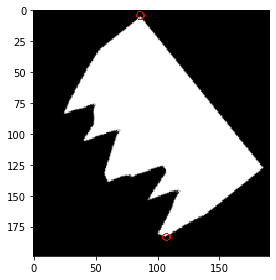

In [260]:
# kąty proste
from skimage.morphology import erosion, dilation, opening, closing, square, disk, star, rectangle
img = io.imread(images_paths[4])
img = dilation(img)
img = erosion(img)
contours = find_contours(img, level=3)
edges = canny(img, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=int((img.shape[0]+img.shape[1])/15), line_gap=5, theta=np.array(range(60,120), dtype=np.double))



img = color.grey2rgb(img)
for n, contour in enumerate(contours):
    appr_pol = approximate_polygon(contour, tolerance=100)
    for c in appr_pol:
        x,y = circle_perimeter(int(c[0]),int(c[1]), 3)
        img[x,y] = [255,0,0]

# appr_pol = np.array([(point[1], point[0]) for point in appr_pol])
# print(appr_pol)
print(lines)
io.imshow(img)


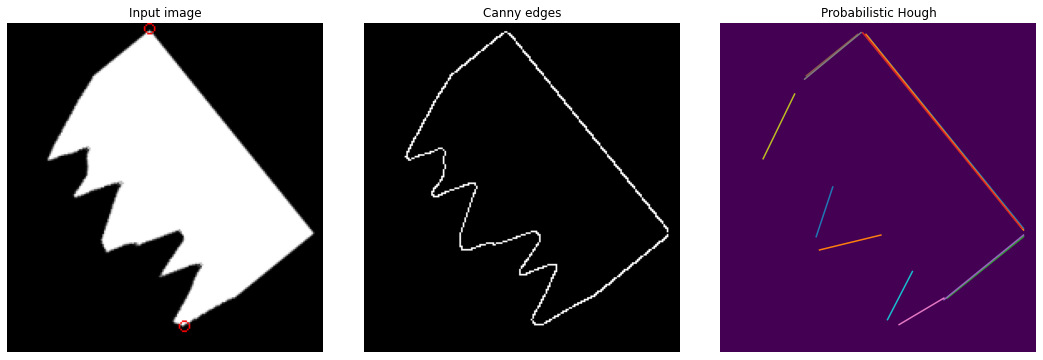

In [261]:
# Generating figure 2
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm
image = img
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [96]:
# wersja używa najdłuższej linii w figurze jako podstawy
def rotate_and_scale_v1(images_paths):
    images = list()
    for image_path in images_paths:
        img = io.imread(image_path)
        angle = get_angle_to_rotate_image(img)
        img = rotate(img, angle)
        images.append(img)
    return images

# wersja szuka linii, które mają kąt prosty jako podstawa, chyba mniejsze zaufanie mam do tego
def rotate_and_scale_v2(images_paths):
    images = list()
    for image_path in images_paths:
        print(image_path)
        img = io.imread(image_path)
        base_line = get_base_line(img)
        angle = get_angle_of_line(base_line)
        img = rotate(img, angle)
        images.append(img)
    return images

In [97]:
imgs = rotate_and_scale_v2(images_paths)
io.imshow(imgs[4])

D:\Dokumenty\Projekty\PIRO/project1/proj1_daneA\set0\0.png
((45, 199), (244, 150)) ((45, 199), (244, 150))
((45, 199), (244, 150)) ((245, 146), (211, 8))
((45, 199), (244, 150)) ((213, 157), (245, 149))
((45, 199), (244, 150)) ((41, 198), (17, 103))
((45, 199), (244, 150)) ((187, 89), (208, 15))
((45, 199), (244, 150)) ((205, 24), (209, 8))
((45, 199), (244, 150)) ((19, 112), (15, 95))
((45, 199), (244, 150)) ((189, 84), (193, 70))
((45, 199), (244, 150)) ((27, 140), (21, 116))
D:\Dokumenty\Projekty\PIRO/project1/proj1_daneA\set0\1.png
((293, 273), (11, 208)) ((293, 273), (11, 208))
((293, 273), (11, 208)) ((295, 273), (10, 207))
((293, 273), (11, 208)) ((9, 206), (53, 17))
((293, 273), (11, 208)) ((9, 203), (51, 20))
((293, 273), (11, 208)) ((296, 272), (322, 167))
((293, 273), (11, 208)) ((309, 217), (321, 166))
((293, 273), (11, 208)) ((297, 272), (306, 234))
((293, 273), (11, 208)) ((116, 108), (155, 79))
D:\Dokumenty\Projekty\PIRO/project1/proj1_daneA\set0\2.png
((139, 184), (7, 9

TypeError: cannot unpack non-iterable NoneType object